In [5]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import models
import os

# Placeholder function to load and preprocess Tiny ImageNet dataset
def load_tiny_imagenet_dataset(data_dir):
    # Placeholder implementation
    # This function should return x_train, y_train, x_val, y_val, classes
    # Replace this with actual code to load and preprocess the dataset
    x_train = tf.random.normal((1000, 32, 32, 3))
    y_train = tf.random.uniform((1000,), minval=0, maxval=200, dtype=tf.int32)
    x_val = tf.random.normal((200, 32, 32, 3))
    y_val = tf.random.uniform((200,), minval=0, maxval=200, dtype=tf.int32)
    classes = list(range(200))
    return x_train, y_train, x_val, y_val, classes

# Function to load and preprocess Tiny ImageNet dataset
def load_and_preprocess_tiny_imagenet():
    # Load Tiny ImageNet dataset
    data_dir = '/Users/prudhvi charan/Documents/Part2/IMagenet-master/tiny-imagenet-200'
    if not os.path.exists(data_dir):
        raise FileNotFoundError(f"Directory '{data_dir}' not found. Please ensure the dataset directory is correct.")
    
    x_train, y_train, x_val, y_val, classes = load_tiny_imagenet_dataset(data_dir)
    
    # Resize images to match the input shape of the model
    x_train_resized = tf.image.resize(x_train, (32, 32))
    x_val_resized = tf.image.resize(x_val, (32, 32))
    
    # Normalize pixel values to be between 0 and 1
    x_train_rescaled = x_train_resized.numpy().astype('float32') / 255
    x_val_rescaled = x_val_resized.numpy().astype('float32') / 255
    
    return x_train_rescaled, y_train, x_val_rescaled, y_val

# Load the best configuration model from Experiment 1
model_path = "/Users/prudhvi charan/Documents/Part1/cifar10_cnn_model_config_2_20240510_101908.keras" 
model = models.load_model(model_path)

# Modify the output layer for 200 classes
model.pop()  # Remove the last layer
model.add(tf.keras.layers.Dense(200, activation='softmax', name='new_output_layer'))  # Add a new output layer with 200 units

# Unfreeze the model's layers for fine-tuning
model.trainable = True
model.build((None, 32, 32, 3))  # Rebuild the model after modifying the architecture
model.summary()  # Optional: print the summary of the modified model

print("Model loaded and modified successfully.")

# Load Tiny ImageNet dataset and preprocess data
x_train, y_train, x_val, y_val = load_and_preprocess_tiny_imagenet()
print("Tiny ImageNet dataset loaded and preprocessed successfully.")

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Assuming labels are integers
              metrics=['accuracy'])

print("Model compiled successfully.")

# Train the model on the Tiny ImageNet dataset
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=1)

print("Model trained successfully.")

# Evaluate the model on the validation set of the Tiny ImageNet dataset
test_loss, test_accuracy = model.evaluate(x_val, y_val, verbose=0)
print("Validation accuracy:", test_accuracy)

# Save the trained model
fine_tuned_model_path = "fine_tuned_model.keras"
model.save(fine_tuned_model_path)

print("Model saved successfully.")

# Save training history to a CSV file
pd.DataFrame(history.history).to_csv("fine_tuning_history.csv", index=False)

print("Training history saved successfully.")


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ new_output_layer (Dense)        │ (None, 200)            │       102,600 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,924,254 (49.30 MB)

 Trainable params: 4,373,064 (16.68 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,551,190 (32.62 MB)

Model loaded and modified successfully.
Tiny ImageNet dataset loaded and preprocessed successfully.
Model compiled successfully.
Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.0050 - loss: 5.6649 - val_accuracy: 0.0100 - val_loss: 5.3126
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.0032 - loss: 5.2902 - val_accuracy: 0.0000e+00 - val_loss: 5.3259
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.0097 - loss: 5.2575 - val_accuracy: 0.0100 - val_loss: 5.3485
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.0108 - loss: 5.2250 - val_accuracy: 0.0000e+00 - val_loss: 5.3470
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.0071 - loss: 5.1993 - val_accuracy: 0.0000e+00 - val_loss: 5.3498
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.0167 - loss: 5.2100 - val_accuracy: 0.0100 - val_loss: 5.3474
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.0103 - loss: 5.2063 - val_accura

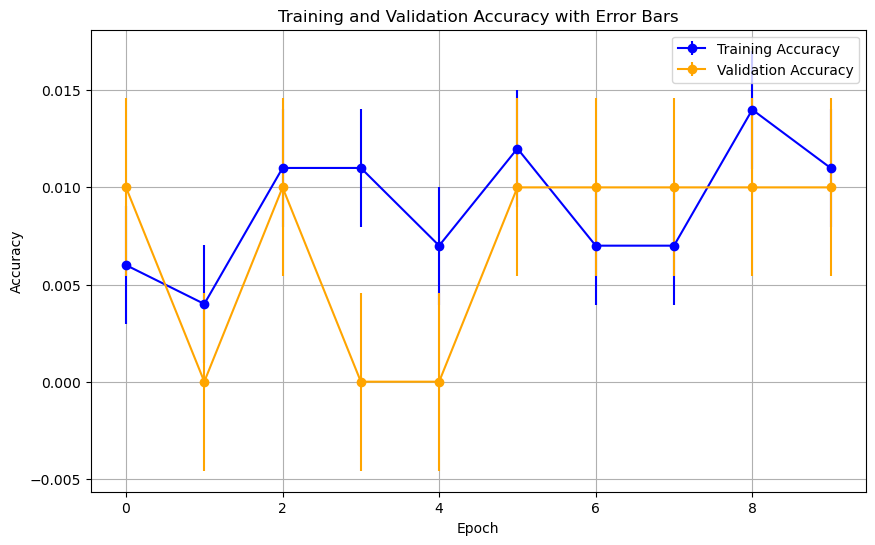

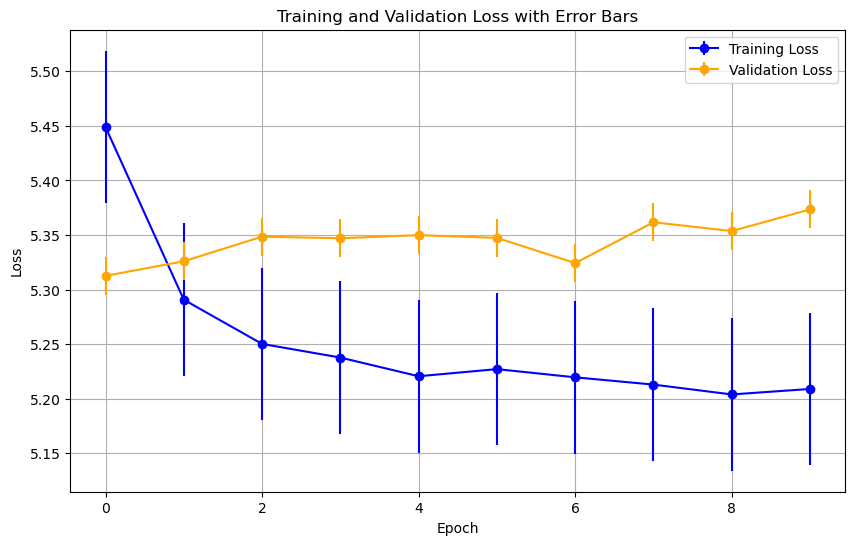

In [14]:
import numpy as np

# Calculate mean and standard deviation of accuracy and loss
train_accuracy_mean = np.mean(history.history['accuracy'])
train_accuracy_std = np.std(history.history['accuracy'])
val_accuracy_mean = np.mean(history.history['val_accuracy'])
val_accuracy_std = np.std(history.history['val_accuracy'])

train_loss_mean = np.mean(history.history['loss'])
train_loss_std = np.std(history.history['loss'])
val_loss_mean = np.mean(history.history['val_loss'])
val_loss_std = np.std(history.history['val_loss'])

# Plot training and validation accuracy with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(range(len(history.history['accuracy'])), history.history['accuracy'], yerr=train_accuracy_std, fmt='-o', color='blue', label='Training Accuracy')
plt.errorbar(range(len(history.history['val_accuracy'])), history.history['val_accuracy'], yerr=val_accuracy_std, fmt='-o', color='orange', label='Validation Accuracy')
plt.title('Training and Validation Accuracy with Error Bars')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')  # Corrected here
plt.legend()
plt.grid(True)
plt.savefig('accuracy_errorbar_plot.png')  # Save the plot as an image file
plt.show()

# Plot training and validation loss with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(range(len(history.history['loss'])), history.history['loss'], yerr=train_loss_std, fmt='-o', color='blue', label='Training Loss')
plt.errorbar(range(len(history.history['val_loss'])), history.history['val_loss'], yerr=val_loss_std, fmt='-o', color='orange', label='Validation Loss')
plt.title('Training and Validation Loss with Error Bars')
plt.xlabel('Epoch')
plt.ylabel('Loss')  # Corrected here
plt.legend()
plt.grid(True)
plt.savefig('loss_errorbar_plot.png')  # Save the plot as an image file
plt.show()
